<a href="https://colab.research.google.com/github/kacp-i/BCU-Work/blob/main/Y2%20S1%20CMP-5367%20Artificial%20Intelligence%20and%20Machine%20Learning/Lab%202/lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What is Data Cleaning?**

In data science we have the famous logo: "garbage in, garbage out". This means that no matter how sophisticated our analytics or predictive algorithms are, the quality of output is dependent on the data input. Since data is the most important part of the process, it is vital that you spend a great amount of time ensuring data is properly refined.

![image](https://media.licdn.com/dms/image/C5112AQFlpRZP-Zc8RA/article-cover_image-shrink_720_1280/0/1568630281806?e=2147483647&v=beta&t=DMF6kOBZvbW00QElPhv20iYX7q65aaxzHm655es-zx4)

# **Exploratory Data Analysis (EDA)**

Exploratory data analysis refers to the critical process of performing initial investigations on data so as to discover patterns, spot anomalies, test hypotheses, and check assumptions with the help of summary statistics and graphical representations. For this lab, we will focus on checking any problems and try to fix them. This is called data preprocessing (cleaning).

**Start by doing the following**



1.   Go to your [lab2](https://moodle.bcu.ac.uk/course/modedit.php?update=8629312&return=0&sr=0) on your Moodle. Download the dataset 'rollingsales_bronx.xls' from moodle and upload it in your colab
2.   Download the lab notebook and upload in your GD and open it.

We will preprocess the [Rolling Sale Data](https://www.nyc.gov/site/finance/property/property-rolling-sales-data.page) The Department of Finance's rolling sales files list tax class 1, 2, and 4 properties that have sold in the last 12-month period in New York City. These files include the neighborhood, building type, square footage, and other data.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#read excel file
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/rollingsales_bronx.xlsx")

#preview data
df.head()


,Bronx Rolling Sales. All Sales From September 2023 - August 2024,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,PTS Sales Data as of 09/06/2024,Unnamed: 20
0,"For sales prior to the Final Roll, Neighborhoo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Note: Condominium and cooperative sales are on...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,2,BATHGATE,NaN,1,2907,24,NaN,A1,4090 PARK AVENUE,NaN,...,1,0,1,2500,1474,1901,1,A1,0,2024-03-28 00:00:00


**What are the issues we have with this dataset?**

### Sample answer


<details><summary>Click here for the solution</summary>
The notable issues with this data frame include:




1.   unnamed columns
2.   missing values in the first three rows



</details>

In [ ]:
#we read the data in again but skip 3 rows this time
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/rollingsales_bronx.xlsx", skiprows = 4, header = [0])

df.head()


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,NaN,1,2907,24,NaN,A1,4090 PARK AVENUE,NaN,...,1.0,0.0,1.0,2500.0,1474.0,1901.0,1,A1,0,2024-03-28
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,27,NaN,A1,2090 WASHINGTON AVENUE,NaN,...,1.0,0.0,1.0,2356.0,2213.0,NaN,1,A1,0,2024-06-11
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,40,NaN,A1,2073 BATHGATE AVENUE,NaN,...,1.0,0.0,1.0,1933.0,1344.0,NaN,1,A1,425000,2024-06-27
3,2,BATHGATE,NaN,1,3047,11,NaN,A1,482 EAST 181ST STREET,NaN,...,1.0,0.0,1.0,1556.0,1240.0,1901.0,1,A1,0,2024-06-14
4,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3050,91,NaN,A9,503 EAST 182 STREET,NaN,...,1.0,0.0,1.0,1960.0,1705.0,NaN,1,A9,515000,2024-04-11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5718 entries, 0 to 5717
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         5718 non-null   int64         
 1   NEIGHBORHOOD                    5718 non-null   object        
 2   BUILDING CLASS CATEGORY         5716 non-null   object        
 3   TAX CLASS AT PRESENT            5718 non-null   object        
 4   BLOCK                           5718 non-null   int64         
 5   LOT                             5718 non-null   int64         
 6   EASEMENT                        0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       5718 non-null   object        
 8   ADDRESS                         5718 non-null   object        
 9   APARTMENT NUMBER                521 non-null    object        
 10  ZIP CODE                        5718 non-null   int64         
 11  RESI

In [ ]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASEMENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

# **Data cleaning**

We will start by fixing the dataset columns for ease of handling.





*   Converting strings to lower or proper case
*   Removing white spaces
*   Renaming column names






In [ ]:
#Extract columns
cols = df.columns
#Create empty list
new_cols = []
#iterate to fix issues with names
for column in cols:
    #to proper case
    proper_cols = column.title()
    #replace space/hyphen with underscore
    proper_cols_hyphen = proper_cols.replace(" ", "_")
    clean_col = proper_cols_hyphen.replace("-", "_")
    #append to empty list
    new_cols.append(clean_col)
#diplay columns
new_cols

#replace existing columns in dataframe with new
df.columns = new_cols

#preview
df.head()

,Borough,Neighborhood,Building_Class_Category,Tax_Class_At_Present,Block,Lot,Easement,Building_Class_At_Present,Address,Apartment_Number,...,Residential_Units,Commercial_Units,Total_Units,Land_Square_Feet,Gross_Square_Feet,Year_Built,Tax_Class_At_Time_Of_Sale,Building_Class_At_Time_Of_Sale,Sale_Price,Sale_Date
0,2,BATHGATE,NaN,1,2907,24,NaN,A1,4090 PARK AVENUE,NaN,...,1.0,0.0,1.0,2500.0,1474.0,1901.0,1,A1,0,2024-03-28
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,27,NaN,A1,2090 WASHINGTON AVENUE,NaN,...,1.0,0.0,1.0,2356.0,2213.0,NaN,1,A1,0,2024-06-11
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,40,NaN,A1,2073 BATHGATE AVENUE,NaN,...,1.0,0.0,1.0,1933.0,1344.0,NaN,1,A1,425000,2024-06-27
3,2,BATHGATE,NaN,1,3047,11,NaN,A1,482 EAST 181ST STREET,NaN,...,1.0,0.0,1.0,1556.0,1240.0,1901.0,1,A1,0,2024-06-14
4,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3050,91,NaN,A9,503 EAST 182 STREET,NaN,...,1.0,0.0,1.0,1960.0,1705.0,NaN,1,A9,515000,2024-04-11


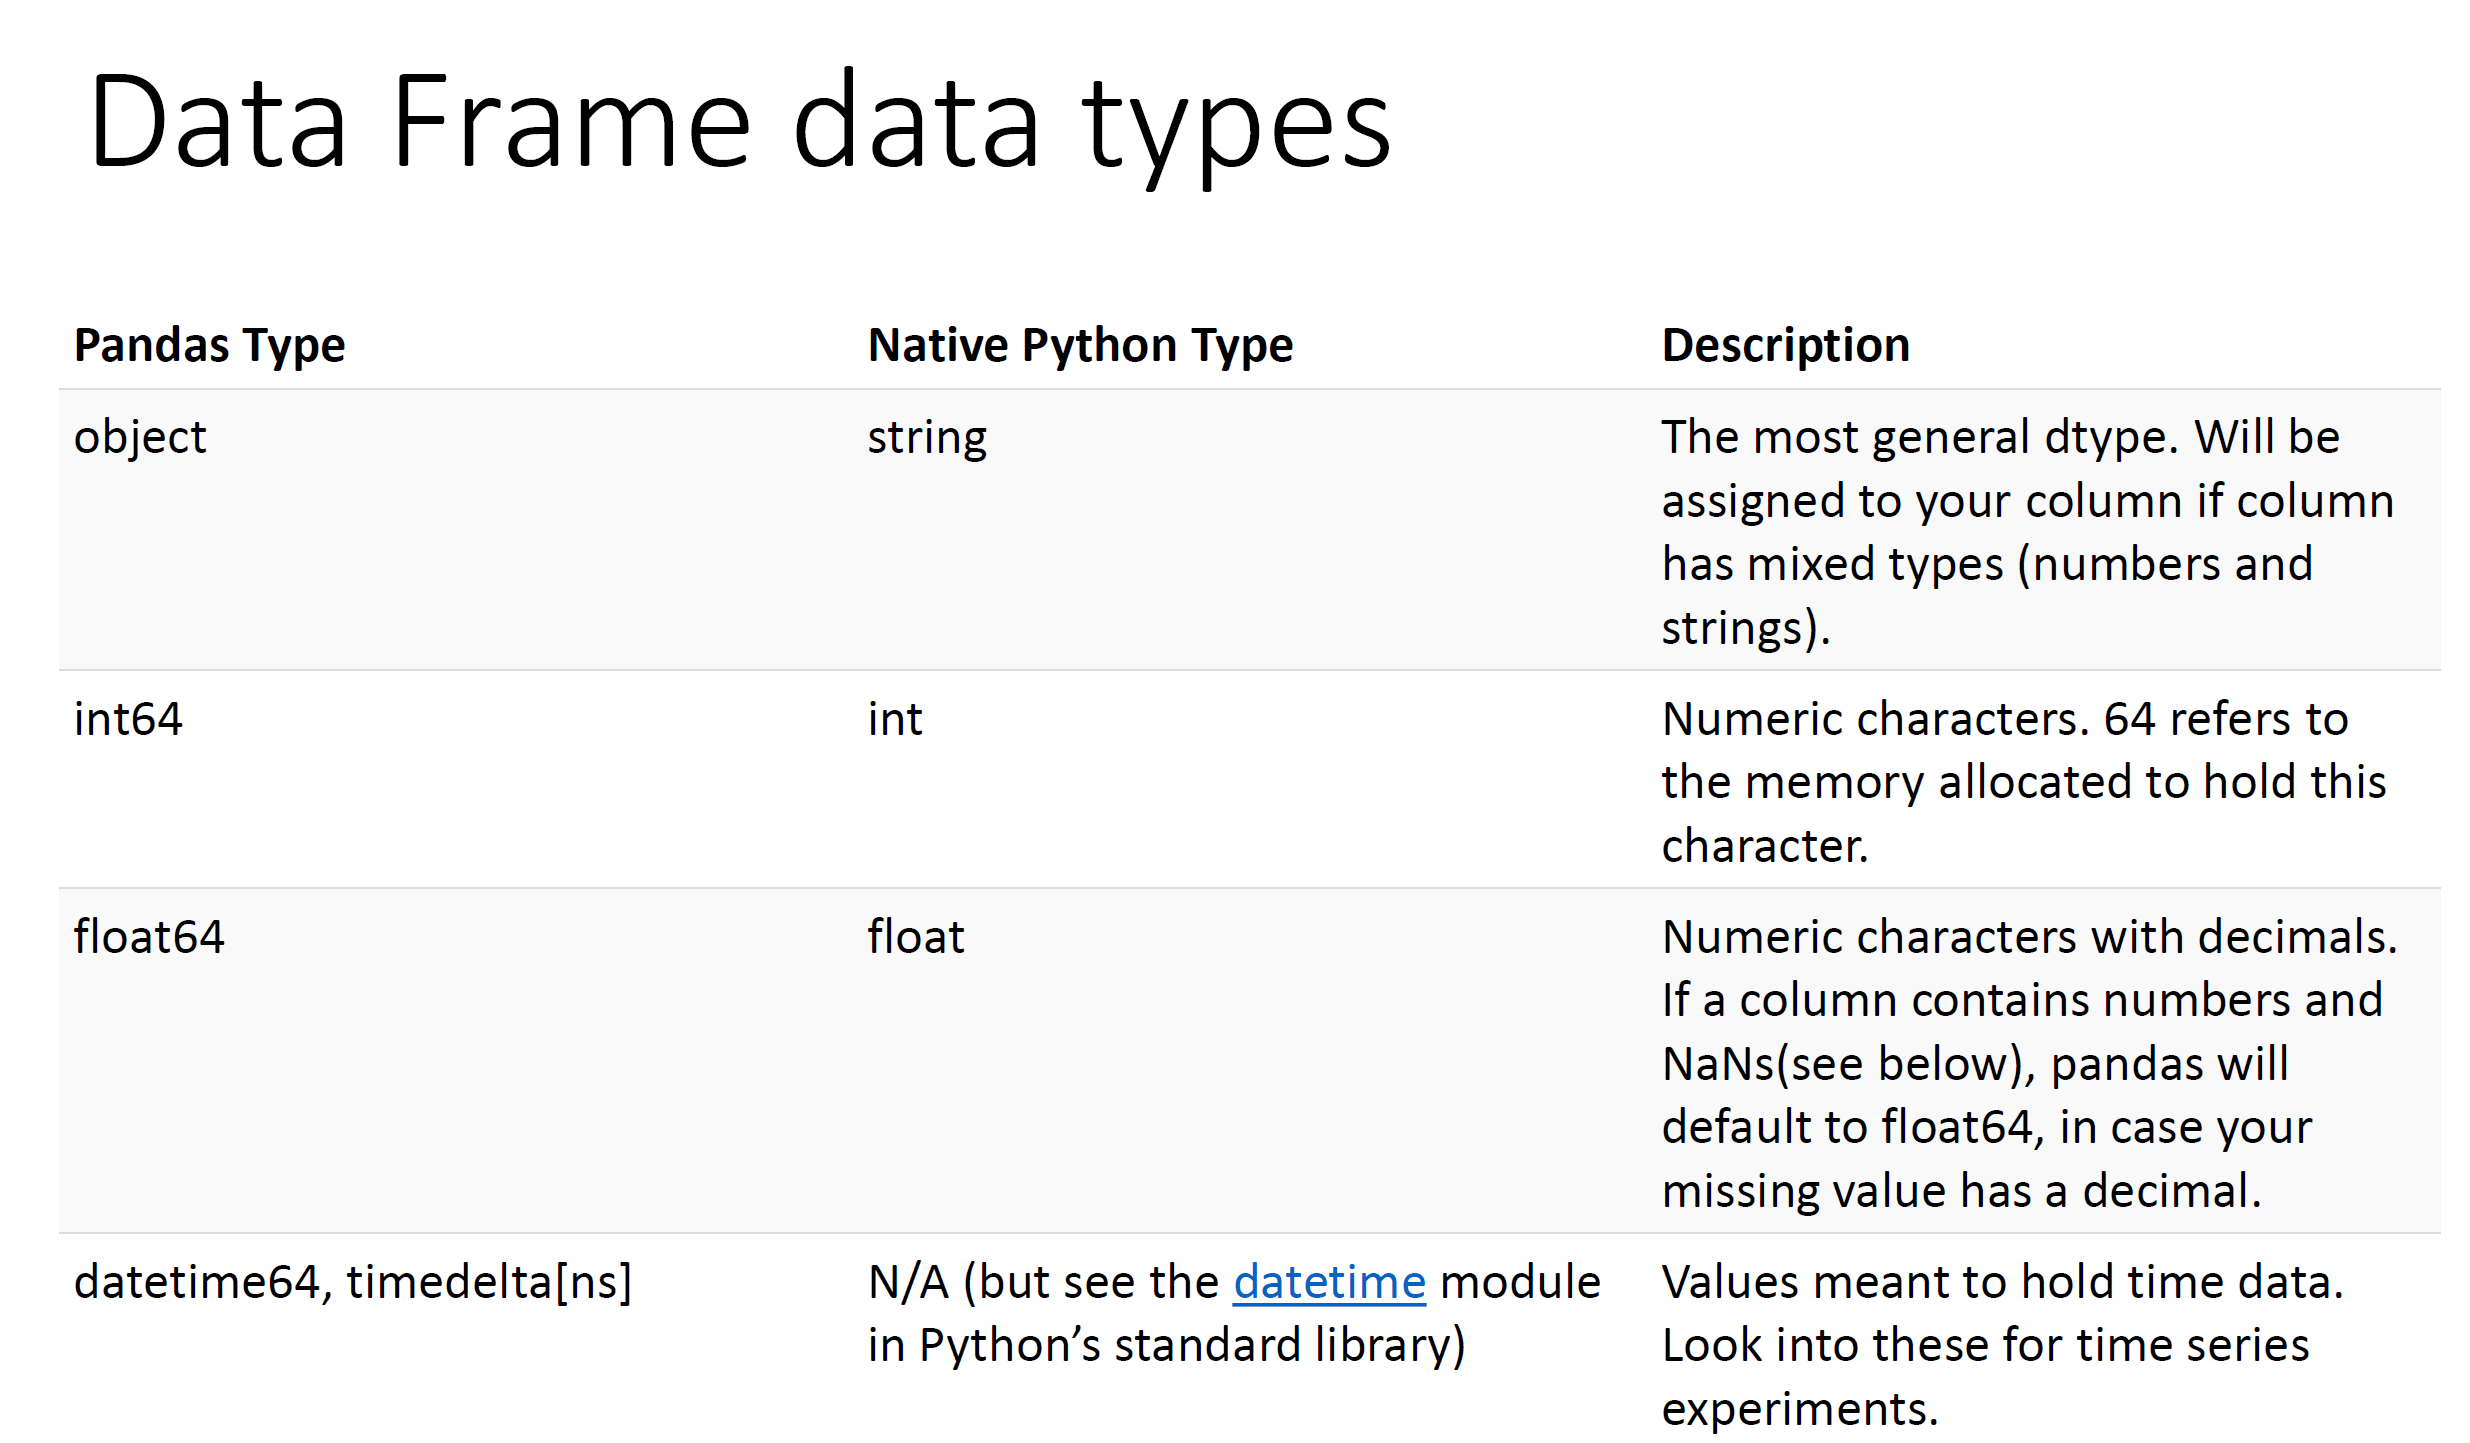


In [ ]:
# Check data types. Why is this important?

#data types
df.dtypes


,0
Borough,int64
Neighborhood,object
Building_Class_Category,object
Tax_Class_At_Present,object
Block,int64
Lot,int64
Easement,float64
Building_Class_At_Present,object
Address,object
Apartment_Number,object


### Which of these data types seem to be incorrect


<details><summary>Click here for an answer</summary>
The Year_Built column should be categorical but is a 'float'.
This is a very common problem where a number is read as a string when you downlaod the data with Pandas. You need to fix it before EDA and before training. Otherwise, it will give you trace errors

</details>

# **Missing data**

Missing values have different representations. It can be shown as NULL, empty strings, NaN, NA, etc. Data context is important in dealing with missing data, and understanding why data is missing is crucial. There are two primary methods for dealing with missing data:

1.   Removal of data
2.   Removal of data



In [ ]:
#Check how many nulls
df.isnull().sum()

,0
Borough,0
Neighborhood,0
Building_Class_Category,2
Tax_Class_At_Present,0
Block,0
Lot,0
Easement,5718
Building_Class_At_Present,0
Address,0
Apartment_Number,5197


In [ ]:
#Get the percentage of missing values in each column
missing_pct = round(df.isnull().sum()/len(df) * 100, 1)
print(missing_pct)


Borough                             0.0
Neighborhood                        0.0
Building_Class_Category             0.0
Tax_Class_At_Present                0.0
Block                               0.0
Lot                                 0.0
Easement                          100.0
Building_Class_At_Present           0.0
Address                             0.0
Apartment_Number                   90.9
Zip_Code                            0.0
Residential_Units                  19.7
Commercial_Units                   28.0
Total_Units                        19.2
Land_Square_Feet                   28.5
Gross_Square_Feet                  28.5
Year_Built                         10.8
Tax_Class_At_Time_Of_Sale           0.0
Building_Class_At_Time_Of_Sale      0.0
Sale_Price                          0.0
Sale_Date                           0.0
dtype: float64


In [ ]:
#columns with more than 30% missing values
drop_cols = missing_pct[missing_pct > 30].index
#We can drop these columns with greater than 30 percent missing values
df_new = df.drop(columns = drop_cols)




### **Rmeove missing values in pandas in different ways**
```
dropna(): drops all the rows with missing values.
dropna(how = 'all'): the rows where all the column values are missing.
dropna(thresh = minimum_value): drop rows based on a threshold.
dropna(axis = 1): drops all the columns with missing values
df = df[~df['Easement'].isnull()] will drop the missing valudes in this particular column only
```

**Important Note**

Sometimes missing values are not detected easily.

In [ ]:
df['Building_Class_Category'].value_counts( normalize=False)

,count
Building_Class_Category,
02 TWO FAMILY DWELLINGS,1485
01 ONE FAMILY DWELLINGS,1129
10 COOPS - ELEVATOR APARTMENTS,994
03 THREE FAMILY DWELLINGS,627
13 CONDOS - ELEVATOR APARTMENTS,339
07 RENTALS - WALKUP APARTMENTS,250
05 TAX CLASS 1 VACANT LAND,164
04 TAX CLASS 1 CONDOS,134
29 COMMERCIAL GARAGES,98


In [ ]:
#Deleting empty strings in a column:

# First Turn it to Nan and then delete nan
nan_value = float("NaN")
df.replace(" ", nan_value, inplace=True)
#create new dataframe where it has no nulls
df = df[~df['Building_Class_Category'].isnull()]
df['Building_Class_Category'].value_counts( normalize=False) # now check that you have the right number as per the original excel file

,count
Building_Class_Category,
02 TWO FAMILY DWELLINGS,1485
01 ONE FAMILY DWELLINGS,1129
10 COOPS - ELEVATOR APARTMENTS,994
03 THREE FAMILY DWELLINGS,627
13 CONDOS - ELEVATOR APARTMENTS,339
07 RENTALS - WALKUP APARTMENTS,250
05 TAX CLASS 1 VACANT LAND,164
04 TAX CLASS 1 CONDOS,134
29 COMMERCIAL GARAGES,98


In [ ]:
df['Sale_Price'].value_counts() # What do you notice here?

,count
Sale_Price,
0,1822
10,86
750000,45
700000,42
7502715,39
...,...
1020000,1
420428,1
556800,1


In [ ]:
# You can fill the Sale Price with replace method,
mean_price = round(df['Sale_Price'].mean(),2) # round the mean to have a better output
df['Sale_Price'].replace(0, mean_price)


,Sale_Price
1,673551.57
2,425000.00
4,515000.00
5,673551.57
6,413000.00
...,...
5713,85000.00
5714,135000.00
5715,265000.00
5716,140000.00


# **Data Imputation**

### Solutions for Data Imputation

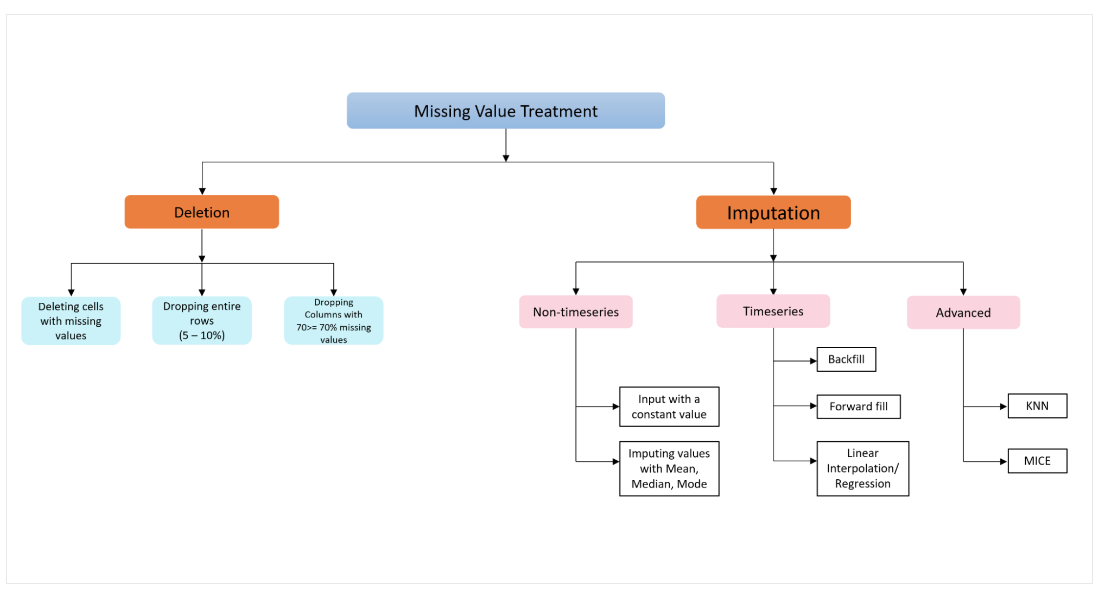

# Measures of central tendency and data dispersion are important for Data Imputation and Analysis

## Measures of central tendency
Mean, Median, Mode

### Mean
<details><summary>Click here for the solution</summary>
The [mean average](https://simple.wikipedia.org/wiki/Mean) is one of the simplest and most common measures used in data analysis. The simplest form of the mean average is the arithmetic mean which is the result of summing all the values of a given variable / attribute together then dividing that by the amount of values.

### Median
<details><summary>Click here for the solution</summary>
The [median average](https://simple.wikipedia.org/wiki/Median) is another simple and common measure used in data analysis. The median can be calculated first by sorting the values from smallest to largest, with an odd amount of values the median can be found at index (n+1) / 2 where n is the amount of values. If there is an even amount of values the median is the mean average of the two elements in the "centre" of the sorted sequence.

### Mode
<details><summary>Click here for the solution</summary>
The modal average is another simple and common measure used in data analysis. The mode is simply the most common value for a given variable / attribute.

In [ ]:
print('The average sale price  is ',df['Sale_Price'].mean())
print('The most common sale price in the data is ', df['Sale_Price'].mode())
print('The median sale price is ',df['Sale_Price'].median())

## Measures of dispersion
Range, IQR, Variance, Standard Deviation

### Range
Range is the difference between the smallest value of a given variable / attribute and the largest.

### Standard Deviation
<details><summary>Click here for the solution</summary>
The [Standard deviation](https://simple.wikipedia.org/wiki/Standard_deviation) is a measure of data dispersion that allows us to see how individual values are spread out from the mean average. The higher the standard deviation the more that the values are spread out from the mean, while the smaller the standard deviation the more values are found close to the mean.

In [ ]:
df['Lot'].std()

769.2648899082421

# Skewness

[Skewness](https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/) is a measure of how symmetric (or asymetric) a given distribution is. We can divide skewness into three general groups, positive skewed, symmetric and negative skewed.

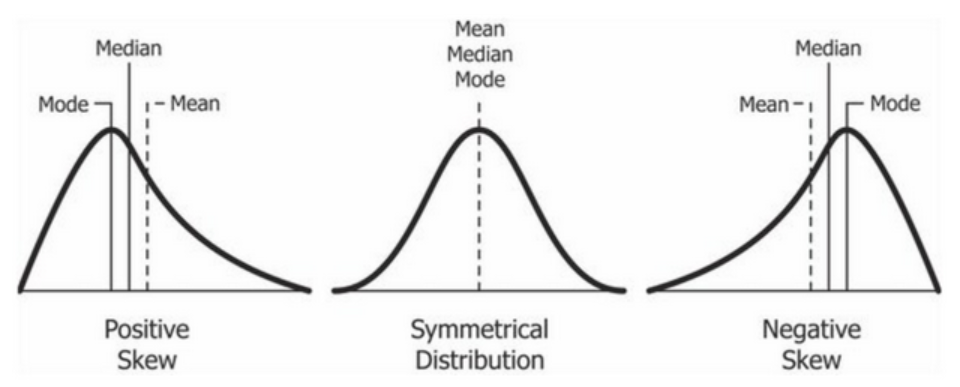

### Positive skew (Right skew)

**skewnorm** takes a real number
 as a skewness parameter When a = 0 the distribution is identical to a normal distribution (norm)

<Axes: xlabel='Sale_Price', ylabel='Count'>

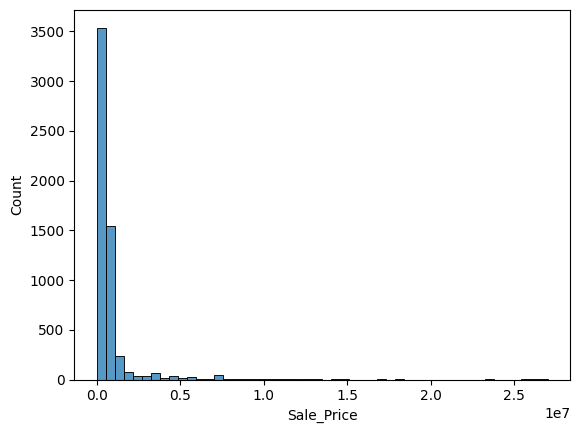

In [ ]:
sns.histplot(df["Sale_Price"], bins=50)

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.skew.html
df["Sale_Price"].skew()

7.322993504016692

### Negative skew (Left skew)

In [ ]:
df['Block'].skew()

-0.10548523085823922

In [ ]:
df.head()

,Borough,Neighborhood,Building_Class_Category,Tax_Class_At_Present,Block,Lot,Easement,Building_Class_At_Present,Address,Apartment_Number,...,Residential_Units,Commercial_Units,Total_Units,Land_Square_Feet,Gross_Square_Feet,Year_Built,Tax_Class_At_Time_Of_Sale,Building_Class_At_Time_Of_Sale,Sale_Price,Sale_Date
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,27,NaN,A1,2090 WASHINGTON AVENUE,NaN,...,1.0,0.0,1.0,2356.0,2213.0,NaN,1,A1,0,2024-06-11
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,40,NaN,A1,2073 BATHGATE AVENUE,NaN,...,1.0,0.0,1.0,1933.0,1344.0,NaN,1,A1,425000,2024-06-27
4,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3050,91,NaN,A9,503 EAST 182 STREET,NaN,...,1.0,0.0,1.0,1960.0,1705.0,NaN,1,A9,515000,2024-04-11
5,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3053,86,NaN,S0,2364 WASHINGTON AVENUE,NaN,...,1.0,2.0,3.0,1911.0,4080.0,NaN,1,S0,0,2023-10-24
6,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3053,103,NaN,A1,2327 BASSFORD AVE,NaN,...,1.0,0.0,1.0,913.0,1248.0,1901.0,1,A1,413000,2024-08-06



### <mark>Remember
*  The mean is a good choice for imputing missing values when the data is normally distributed and has no extreme values (outliers).
*  The median is a good choice for imputing missing values when the data is skewed or has extreme values.
*   The mode is a good choice for imputing missing values when the data is categorical or discrete.






# **Data Scaling**

It can be difficult to compare the Square feet  2356.0 with the Price 425000, but if we scale them both into comparable values, we can easily see how much one value is compared to the other.

There are different methods for scaling data:

**Data Normalization**

Normalization is a rescaling of the data from the original range so that all values are within the new range of 0 and 1.

Normalization requires that you know or are able to accurately estimate the minimum and maximum observable values. The normalisation method uses this formula:

y = (x – min) / (max – min)
Where the minimum and maximum values pertain to the value x being normalized.

**Data Standardization**

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.
The standardization method uses this formula:

z = (x - u) / s

Where z is the new value, x is the original value, u is the mean and s is the standard deviation.

<mark>Should I normalise or standardise??</mark>

In [ ]:
# You can normalize your dataset using the scikit-learn object MinMaxScaler.
# Fit the scaler using available training data. For normalization, this means the training data will be used to estimate the minimum and maximum observable values. This is done by calling the fit() function.
# Apply the scale to training data. This means you can use the normalized data to train your model. This is done by calling the transform() function.
# Apply the scale to data going forward. This means you can prepare new data in the future on which you want to make predictions.
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define data
X = df[['Land_Square_Feet', 'Sale_Price']]
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform( X)
print(scaled)

[[0.00041981 0.        ]
 [0.00034444 0.01573025]
 [0.00034925 0.01906137]
 ...
 [       nan 0.00980828]
 [       nan 0.00518173]
 [0.00113596 0.06662225]]


In [ ]:
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

# df = pandas.read_csv("data.csv")

X = df[['Land_Square_Feet', 'Sale_Price']]

scaledX = scale.fit_transform(X)

print(scaledX)

[[-0.05118022 -0.44433251]
 [-0.05307463 -0.16396598]
 [-0.05295371 -0.10459424]
 ...
 [        nan -0.26951573]
 [        nan -0.35197647]
 [-0.03318111  0.74310221]]


In [ ]:
# A neat way to scale the columns directly in Panas ( You need to define your scaler first)

df[['Land_Square_Feet', 'Sale_Price']]= scaler.fit_transform(df[['Land_Square_Feet', 'Sale_Price']])
df.head()

,Borough,Neighborhood,Building_Class_Category,Tax_Class_At_Present,Block,Lot,Easement,Building_Class_At_Present,Address,Apartment_Number,...,Residential_Units,Commercial_Units,Total_Units,Land_Square_Feet,Gross_Square_Feet,Year_Built,Tax_Class_At_Time_Of_Sale,Building_Class_At_Time_Of_Sale,Sale_Price,Sale_Date
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,27,NaN,A1,2090 WASHINGTON AVENUE,NaN,...,1.0,0.0,1.0,0.000420,2213.0,NaN,1,A1,0.000000,2024-06-11
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,40,NaN,A1,2073 BATHGATE AVENUE,NaN,...,1.0,0.0,1.0,0.000344,1344.0,NaN,1,A1,0.015730,2024-06-27
4,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3050,91,NaN,A9,503 EAST 182 STREET,NaN,...,1.0,0.0,1.0,0.000349,1705.0,NaN,1,A9,0.019061,2024-04-11
5,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3053,86,NaN,S0,2364 WASHINGTON AVENUE,NaN,...,1.0,2.0,3.0,0.000341,4080.0,NaN,1,S0,0.000000,2023-10-24
6,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3053,103,NaN,A1,2327 BASSFORD AVE,NaN,...,1.0,0.0,1.0,0.000163,1248.0,1901.0,1,A1,0.015286,2024-08-06


In [ ]:
df['Sale_Price'].min()

0.0

# **Imputing Categorical Data**

One Hot Encoding: We turn the categorical value into an integers of 0s and 1s.

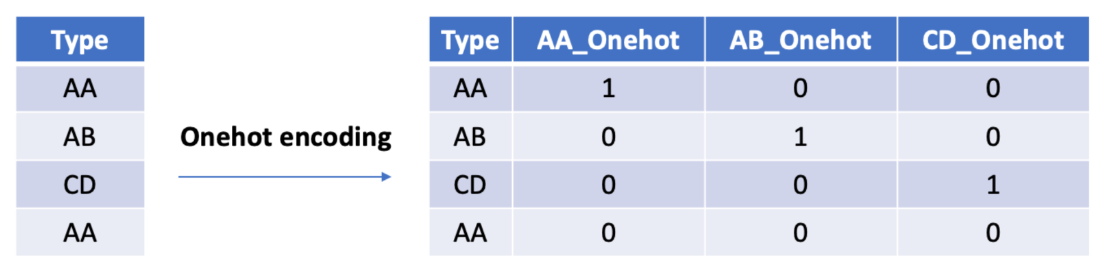

In [ ]:
df.head()

,Borough,Neighborhood,Building_Class_Category,Tax_Class_At_Present,Block,Lot,Easement,Building_Class_At_Present,Address,Apartment_Number,...,Residential_Units,Commercial_Units,Total_Units,Land_Square_Feet,Gross_Square_Feet,Year_Built,Tax_Class_At_Time_Of_Sale,Building_Class_At_Time_Of_Sale,Sale_Price,Sale_Date
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,27,NaN,A1,2090 WASHINGTON AVENUE,NaN,...,1.0,0.0,1.0,0.000420,2213.0,NaN,1,A1,0.000000,2024-06-11
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,40,NaN,A1,2073 BATHGATE AVENUE,NaN,...,1.0,0.0,1.0,0.000344,1344.0,NaN,1,A1,0.015730,2024-06-27
4,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3050,91,NaN,A9,503 EAST 182 STREET,NaN,...,1.0,0.0,1.0,0.000349,1705.0,NaN,1,A9,0.019061,2024-04-11
5,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3053,86,NaN,S0,2364 WASHINGTON AVENUE,NaN,...,1.0,2.0,3.0,0.000341,4080.0,NaN,1,S0,0.000000,2023-10-24
6,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3053,103,NaN,A1,2327 BASSFORD AVE,NaN,...,1.0,0.0,1.0,0.000163,1248.0,1901.0,1,A1,0.015286,2024-08-06


In [ ]:
# Turn the Neighborhood category thru onehot encoding

pd.get_dummies(df.Neighborhood,dtype=int)

,BATHGATE,BAYCHESTER,BEDFORD PARK/NORWOOD,BELMONT,BRONX PARK,BRONXDALE,CASTLE HILL/UNIONPORT,CITY ISLAND,CITY ISLAND-PELHAM STRIP,CO-OP CITY,...,PELHAM PARKWAY SOUTH,RIVERDALE,SCHUYLERVILLE/PELHAM BAY,SOUNDVIEW,THROGS NECK,VAN CORTLANDT PARK,WAKEFIELD,WESTCHESTER,WILLIAMSBRIDGE,WOODLAWN
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5716,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.columns

Index(['Borough', 'Neighborhood', 'Building_Class_Category',
       'Tax_Class_At_Present', 'Block', 'Lot', 'Easement',
       'Building_Class_At_Present', 'Address', 'Apartment_Number', 'Zip_Code',
       'Residential_Units', 'Commercial_Units', 'Total_Units',
       'Land_Square_Feet', 'Gross_Square_Feet', 'Year_Built',
       'Tax_Class_At_Time_Of_Sale', 'Building_Class_At_Time_Of_Sale',
       'Sale_Price', 'Sale_Date'],
      dtype='object')

In [ ]:
# I can have a function that changes the column to one hot encoded columns and then drop the original

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]],dtype=int)
    newEncodedData = pd.concat([original_dataframe, dummies], axis=1)

    original_dataframe = newEncodedData.drop([feature_to_encode], axis=1)

    return( original_dataframe)

In [ ]:
feature_to_encode = 'Neighborhood'

encoded_data = encode_and_bind(df, feature_to_encode)

In [ ]:
encoded_data.head()

,Borough,Building_Class_Category,Tax_Class_At_Present,Block,Lot,Easement,Building_Class_At_Present,Address,Apartment_Number,Zip_Code,...,Neighborhood_PELHAM PARKWAY SOUTH,Neighborhood_RIVERDALE,Neighborhood_SCHUYLERVILLE/PELHAM BAY,Neighborhood_SOUNDVIEW,Neighborhood_THROGS NECK,Neighborhood_VAN CORTLANDT PARK,Neighborhood_WAKEFIELD,Neighborhood_WESTCHESTER,Neighborhood_WILLIAMSBRIDGE,Neighborhood_WOODLAWN
1,2,01 ONE FAMILY DWELLINGS,1,3046,27,NaN,A1,2090 WASHINGTON AVENUE,NaN,10457,...,0,0,0,0,0,0,0,0,0,0
2,2,01 ONE FAMILY DWELLINGS,1,3046,40,NaN,A1,2073 BATHGATE AVENUE,NaN,10457,...,0,0,0,0,0,0,0,0,0,0
4,2,01 ONE FAMILY DWELLINGS,1,3050,91,NaN,A9,503 EAST 182 STREET,NaN,10457,...,0,0,0,0,0,0,0,0,0,0
5,2,01 ONE FAMILY DWELLINGS,1,3053,86,NaN,S0,2364 WASHINGTON AVENUE,NaN,10458,...,0,0,0,0,0,0,0,0,0,0
6,2,01 ONE FAMILY DWELLINGS,1,3053,103,NaN,A1,2327 BASSFORD AVE,NaN,10458,...,0,0,0,0,0,0,0,0,0,0


## Question: Datasets
How should I change missing values of the price and the year in my dataset?

**Mean/Median Imputation**

In [ ]:
# Change with the median
df_new['Year_Built'].fillna(df_new['Year_Built'].median(), inplace = True)


In [ ]:
df_new['Year_Built']

,Year_Built
0,1901.0
1,1945.0
2,1945.0
3,1901.0
4,1945.0
...,...
5713,1957.0
5714,1957.0
5715,1957.0
5716,1957.0


In [ ]:
#Fix Year_Built column
df_new.Year_Built = df_new.Year_Built.astype("str")

#Check
df_new.dtypes

,0
Borough,int64
Neighborhood,object
Building_Class_Category,object
Tax_Class_At_Present,object
Block,int64
Lot,int64
Building_Class_At_Present,object
Address,object
Zip_Code,int64
Residential_Units,float64


# **NLP Special Processing: Cleaning Textual Data**

The way you clean textual data depends on the problem you are tackling. For example, if you are detecting spam from ham email you will need to lower case all words to make sure that you have consistency. You may not need emojis. However, when detection emotion trends on tweets for example emojis will be very important to turn into words and perhaps punctuation as well will be important, why?

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spare.csv', encoding='UTF8')
data.head()

,Unnamed: 0,user,location,text
0,0,Magalette1,Germany,"RT @Mu_Ri_Elle: (Video in French, part 2).\n\n..."
1,1,win_a_cup,"Toronto, Ontario",RT @_marlanderthews: EXCLUSIVE: #NHLAllStarVot...
2,2,cestsanssucre,NaN,"RT @cestsanssucre: In English, this translates..."
3,3,stevensrms,Houston,RT @NicsuPR: … “I couldn’t think of a single h...
4,4,barchieshome,she/her | 20+,”This book would’ve been impossible (logistica...


In [ ]:
data['text']=data['text'].astype('str')

In [ ]:
#Converting to lower case
data['text']  = data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['text'].head()

,text
0,"rt @mu_ri_elle: (video in french, part 2). ""we..."
1,rt @_marlanderthews: exclusive: #nhlallstarvot...
2,"rt @cestsanssucre: in english, this translates..."
3,rt @nicsupr: … “i couldn’t think of a single h...
4,”this book would’ve been impossible (logistica...


In [ ]:
#Removing the Punctuation
data['text'] = data['text'].str.replace('[^\w\s]', '')
data['text'].head()

,text
0,"rt @mu_ri_elle: (video in french, part 2). ""we..."
1,rt @_marlanderthews: exclusive: #nhlallstarvot...
2,"rt @cestsanssucre: in english, this translates..."
3,rt @nicsupr: … “i couldn’t think of a single h...
4,”this book would’ve been impossible (logistica...


In [ ]:
#Removing Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['text'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text
0,"rt @mu_ri_elle: (video french, part 2). ""we th..."
1,rt @_marlanderthews: exclusive: #nhlallstarvot...
2,"rt @cestsanssucre: english, translates directl..."
3,rt @nicsupr: … “i couldn’t think single human ...
4,"”this book would’ve impossible (logistically, ..."


In [ ]:
# Removing special characters

import string
import re
#make translator object

def processTweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    translator=str.maketrans('','',string.punctuation)
    tweet=tweet.translate(translator)
    tweet = tweet.strip('\'"')
    return tweet


In [ ]:
data['text'][1]

'rt @_marlanderthews: exclusive: #nhlallstarvote william nylander states he’s big fan #bts, #taylorswift #velma. also says…'

In [ ]:
data['text']= data['text'].apply(processTweet)
data['text'][1]

'rt exclusive nhlallstarvote william nylander states he’s big fan bts taylorswift velma also says…'

# **Exercise 1 for Lab 2**

Download another file from the 'Manhattan' dataset from  [Rolling Sale Data](https://www.nyc.gov/site/finance/property/property-rolling-sales-data.page) and do the following:



1.  Clean the dataset.
2. Check missing data and remove or impute them (explain why you for each step).
3. Impute some categorical data using one hot encoding
4. Check the standard deviation, mean and median of some values.
5. Fill in the missing values according to your understanding of the data



In [ ]:
# read the excel file
df = pd.DataFrame(pd.read_excel("/content/drive/MyDrive/Colab Notebooks/rollingsales_manhattan.xlsx"))

In [ ]:
# skip the first 4th rows and set the (new) row of index 0 as the column headers
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/rollingsales_manhattan.xlsx", skiprows = 4, header = [0])

In [ ]:
# shows the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16102 entries, 0 to 16101
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         16102 non-null  int64         
 1   NEIGHBORHOOD                    16102 non-null  object        
 2   BUILDING CLASS CATEGORY         16102 non-null  object        
 3   TAX CLASS AT PRESENT            16102 non-null  object        
 4   BLOCK                           16102 non-null  int64         
 5   LOT                             16102 non-null  int64         
 6   EASEMENT                        0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       16102 non-null  object        
 8   ADDRESS                         16102 non-null  object        
 9   APARTMENT NUMBER                7149 non-null   object        
 10  ZIP CODE                        16102 non-null  int64         
 11  RE

In [ ]:
#Extract columns
cols = df.columns
#Create empty list
new_cols = []
#iterate to fix issues with names
for column in cols:
    #to proper case
    proper_cols = column.title()
    #replace space/hyphen with underscore
    proper_cols_hyphen = proper_cols.replace(" ", "_")
    clean_col = proper_cols_hyphen.replace("-", "_")
    #append to empty list
    new_cols.append(clean_col)
#diplay columns
new_cols

#replace existing columns in dataframe with new
df.columns = new_cols

#preview
df.head()

,Borough,Neighborhood,Building_Class_Category,Tax_Class_At_Present,Block,Lot,Easement,Building_Class_At_Present,Address,Apartment_Number,...,Residential_Units,Commercial_Units,Total_Units,Land_Square_Feet,Gross_Square_Feet,Year_Built,Tax_Class_At_Time_Of_Sale,Building_Class_At_Time_Of_Sale,Sale_Price,Sale_Date
0,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,386,7,NaN,S2,49 AVENUE B,NaN,...,2.0,1.0,3.0,1725.0,2304.0,1880.0,1,S2,0,2023-11-02
1,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,386,8,NaN,S2,51 AVENUE B,NaN,...,2.0,1.0,3.0,1530.0,1920.0,1880.0,1,S2,0,2023-11-02
2,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,10,NaN,C0,356 E 8 ST,NaN,...,3.0,0.0,3.0,1804.0,2928.0,1899.0,1,C0,2000000,2024-03-13
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,9,NaN,C1,234 E 7TH ST,NaN,...,20.0,0.0,20.0,2059.0,6490.0,1900.0,2,C1,5615000,2024-05-30
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,376,25,NaN,C3,266 EAST 7TH,NaN,...,4.0,0.0,4.0,2059.0,3764.0,1900.0,2,C3,0,2023-11-09


In [ ]:
#Get the percentage of missing values in each column
missing_pct = round(df.isnull().sum()/len(df) * 100, 1)
print(missing_pct)

Borough                             0.0
Neighborhood                        0.0
Building_Class_Category             0.0
Tax_Class_At_Present                0.0
Block                               0.0
Lot                                 0.0
Easement                          100.0
Building_Class_At_Present           0.0
Address                             0.0
Apartment_Number                   55.6
Zip_Code                            0.0
Residential_Units                  50.3
Commercial_Units                   86.5
Total_Units                        46.2
Land_Square_Feet                   90.5
Gross_Square_Feet                  90.5
Year_Built                         10.5
Tax_Class_At_Time_Of_Sale           0.0
Building_Class_At_Time_Of_Sale      0.0
Sale_Price                          0.0
Sale_Date                           0.0
dtype: float64


In [ ]:
#columns with more than 60% missing values
drop_cols = missing_pct[missing_pct > 60].index
#We can drop these columns with greater than 60 percent missing values
df_new = df.drop(columns = drop_cols)

# **Exercise 2 for Lab 2**

Download the [sentiment_analysis](https://moodle.bcu.ac.uk/course/modedit.php?update=8629312&return=0&sr=0) tweet dataset and clean the tweets and give reasons for your choice